<a href="https://colab.research.google.com/github/Rohit-Thakre/Machine-Learning-/blob/main/Code/ML%20Model/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.metrics import  accuracy_score as score

In [155]:
iris = load_iris()

In [156]:
df = pd.DataFrame(data =iris.data, columns = iris.feature_names)
target = pd.DataFrame(iris.target, columns= ["target"])

In [157]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [158]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [160]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [161]:
mms = MinMaxScaler()

In [162]:
mms_df = mms.fit_transform(df)

In [163]:
df = pd.DataFrame(data = mms_df, columns= df.columns)

In [164]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


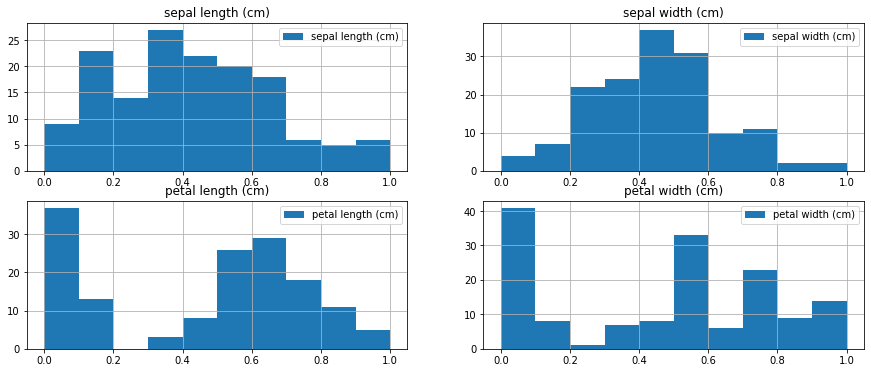

In [165]:
plt.figure(figsize = (15,6))
for x, y in enumerate(df.columns):
  # print(x,y)
  plt.subplot(2,2,x+1)
  plt.hist(df[y], label= y)
  plt.title(y)
  plt.legend()
  plt.grid(True)
  # plt.show()

In [167]:
corr = df.copy()
corr['target'] = target 
corr = corr.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [168]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


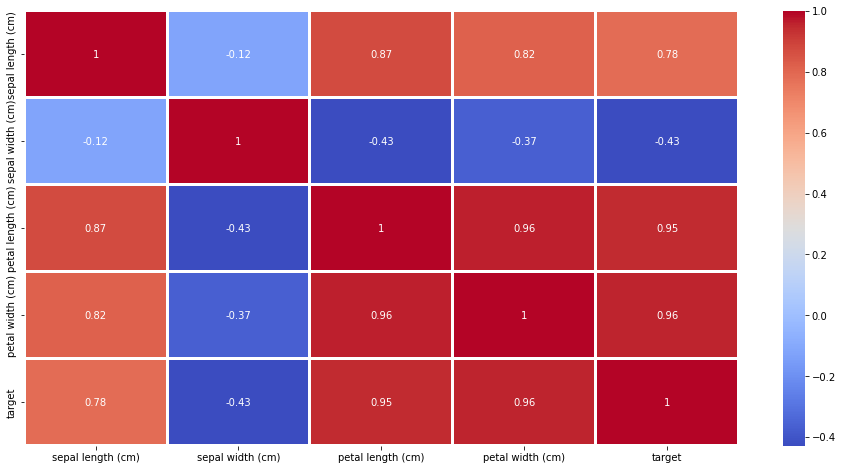

In [169]:
plt.figure(figsize=(16,8))
sns.heatmap(data= corr, cmap= "coolwarm",  linewidths=2, linecolor= 'w',annot = True )
plt.show()

In [170]:
# after visualizing data sepal width is not that important for prediction target and it's correlation with other columns are also low, that's why removing it. 
df.drop('sepal width (cm)', axis = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [171]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = .2, random_state = 27)

In [172]:
x_train.shape

(120, 4)

In [173]:
x_test.shape

(30, 4)

In [174]:
y_train.shape

(120, 1)

In [175]:
y_test.shape

(30, 1)

In [176]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [177]:
model1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [178]:
pred = model1.predict(x_test)

In [179]:
score(y_test, pred)

0.9333333333333333

In [180]:
lst  = []
for x in range(1, 11):
  model2 = KNeighborsClassifier(n_neighbors=x)
  model2.fit(x_train, y_train)
  pred1 = model2.predict(x_test)
  accu = score(y_test, pred1)
  lst.append(accu)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [181]:
len(lst)

10

In [182]:
lst

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [183]:
# Logistic Regression model
model3 = lr()

In [184]:
model3.fit(x_test , y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
pred2 = model3.predict(x_test)

In [186]:
score(y_test,pred2)

0.9

In [187]:
from sklearn.tree import DecisionTreeClassifier as tr

In [188]:
model4 = tr()

In [189]:
model4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [190]:
pred3= model4.predict(x_test)

In [191]:
score(y_test, pred3)

0.9